
<h1><center>Examen 1</center></h1>

<center>**Computación y Análisis de Datos Geofísicos**</center>

<center>**Evelin Martínez Izaguirre***</center>
<br />
*Unidad Multidisciplinaria de Docencia e Investigación (UMDI), Facultad de Ciencias, campus Juriquilla, Querétaro.
<br />
Universidad Nacional Autónoma de México. Boulevard Juriquilla 3001, Juriquilla, Querétaro, 76230, México
e-mail: evemi@ciencias.unam.mx.
_______________________________________________________________________________________________________________________________
<h3>Relación de Gutenberg-Ritcher</h3>
<div style="text-align: justify">
La relación Gutenberg-Ritcher o relación G-R, es uno de los modelos más usados en sismología. Esta relación es muy simple, ya que el número de sismos (N) está relacionado con la magnitud (m) de forma lineal mediante dos constantes, a y b. 

Mendoza (2012) menciona que esta relación de *frecuencia-magnitud* fue inicialmente propuesta por Ishimoto e Ida (1939) en Japón, así como por Gutenberg y Ritcher (1944, 1954) en Estados Unidos. 

Como ya se mencionó, la relación muestra la distribución relativa de los tamaños de los terremotos y queda definida como:
<br />
<br />
$$log_{10}(N) = a-b(M-M_1); M ≥ M_1$$


Donde:

<ul>
<li>$N=$ Número acumulado de eventos en una región y ventana de tiempo específicos, con magnitudes mayores o iguales a m,</li>

<li>$a=$ Medida del nivel de sismicidad regional, es decir, el total de eventos esperados en la región.</li>

<li>$b=$ Constante *b*, mejor conocida como *valor b* varía de región en región, pero se encuentra en el rango $0.8<b<1.2$.</li>
</ul>


<h3>Valor b</h3>
El valor *b* de acuerdo a Mendoza (2012) es el valor de la pendiente de la recta que mejor se ajusta a la parte lineal del logaritmo del número acumulado de eventos y la magnitud en una región (*relación G-R*), este parametro describe la distribución relativa de los tamaños de los eventos.

Aki (1965) determinó que el vaor máximo de *b* es:



$$b = (log_{10}e\over\bar{M}-M_1)$$



<h3>Mínimos cuadrados</h3>



El método de mínimos cuadrados se llama así porque obedece a encontrar la recta que proporcione las mínimas distancias entre dicha recta y los puntos u observaciones.Las distancias,los residuos o errores, son elevadas al cuadrado.

Emplea las siguientes funciones:

$$\Delta = n \Sigma x^2 - (\Sigma x)^2$$ 

$$b = \displaystyle{(\Sigma x^2 \Sigma y -\Sigma x \Sigma xy)\over \Delta}$$

$$m = \displaystyle{(n \Sigma xy -\Sigma x \Sigma y)\over \Delta}$$

Error cuadrático medio: $$\sqrt{(\Sigma (y-y´)^2\over n}$$


<h3>Ajuste lineal</h3>


El análisis de regresión simple investiga la relación estadística que existe entre una variable dependiente ($Y$) y una varibale independiente ($X$).

$Y=$ Variable dependiente: Está predicha; es medida, aleatoria, explicada.
$X=$ Variable independiente: Es predictoria; es controlada, no aleatoria, explicativa.

Busca una función $X_i$ muy simple (lineal) que permita aproximar $Y$ mediante:

$$Y_i=(a+bX_i)+ \epsilon_i$$



Donde:

$a=$ Punto de corte en el eje de las ordenadas, ordena al origen, constante.

$b=$ Pendiente, gradiente de la recta, coeficiente de regresión.

$\epsilon i=$ Error residual, residuo: $$\epsilon_i=Y-Y_i$$


</div>

**Cargar paqueterías**

In [252]:
using LaTeXStrings

In [253]:
using Plots

In [254]:
pyplot()

Plots.PyPlotBackend()

In [255]:
using StatsBase

Cargar, renombrar y editar datos

In [256]:
mag=readdlm("Manitude.dat");

In [257]:
mag1c=mag[:,1];

In [258]:
typeof(mag)

Array{Float64,2}

In [259]:
typeof(mag1c)

Array{Float64,1}

**Parte 1**

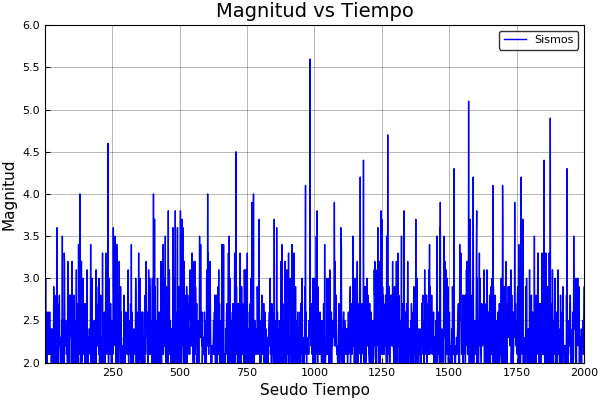

In [260]:
plot(mag1c, ylab="Magnitud", xlab="Seudo Tiempo", title="Magnitud vs Tiempo", box=:true, label="Sismos", color="blue",ylims=(2,6),yticks=(2:0.5:6),xticks=(0:250:2000), gridalpha=.4, grid=1.5, grid=:true, gridcolor="black") #Primer gráfica

**Parte 2**

In [261]:
id = collect(1:2000)
mg=hcat(id,mag1c); #Vector con 2 columnas

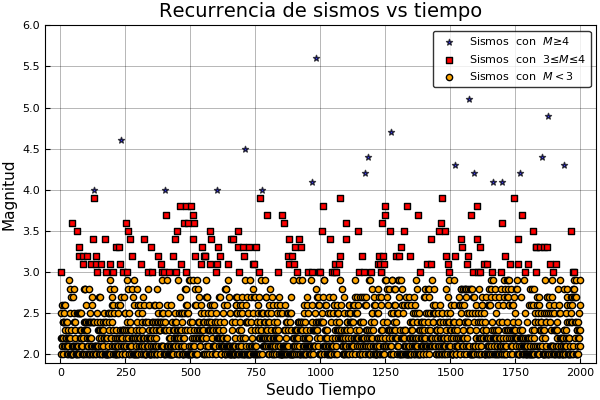

In [262]:

ind=[1:2000]
id=collect(1:2000)
mg=hcat(id,mag1c)
ind1=Int[]
ind2=Int[]
ind3=Int[]

for k=1:length(mg[:,2])
    mags=mg[k,2]
    if mags >= 4
        push!(ind1,k)
    elseif 3 <= mags < 4
        push!(ind2,k)
    elseif mags < 3
        push!(ind3,k)
    end
end

mag3 = mg[ind1, :]
mag2 = mg[ind2, :]
mag1 = mg[ind3, :]

scatter(mag3[:,1], mag3[:, 2], color="blue", ylabel="Magnitud", xlabel="Seudo Tiempo", m=(4.5, :star5), label=L"Sismos  con  $M≥4$", box=:true,title="Recurrencia de sismos vs tiempo", ylims=(1.9,6),yticks=(2:0.5:6),xticks=(0:250:2000), alpha=0.75, gridalpha=.4, grid=1.5, grid=:true, gridcolor="black") 
scatter!(mag2[:,1], mag2[:, 2], color="Red", m=(4.5,:rect), label=L"Sismos  con  $3≤M≤4$")       
scatter!(mag1[:,1], mag1[:, 2], color="orange", m=(4.5), label=L"Sismos  con  $M<3$")
#Separación de magnitudes y scatter
#ylims=(0,450)
#xlims
#xticks=(2:.02:5.8,¨[])
#xticks=(0.5:250:2000)

**Parte 3**

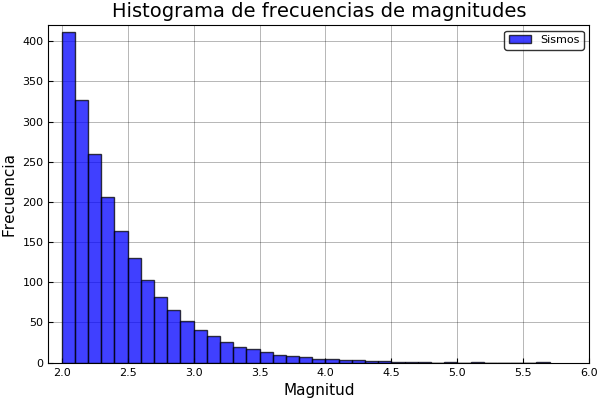

In [263]:
histogram(mag1c, ylab="Frecuencia", xlab="Magnitud", box=:True, color="blue", title="Histograma de frecuencias de magnitudes", label="Sismos", alpha=0.75, gridalpha=.4, grid=1.5, grid=:true, gridcolor="black", xlims=(1.9,6),xticks=(2:0.5:6), ylims=(0,420),yticks=(0:50:400))


In [264]:
a=fit(Histogram, mag[:,], 2:0.1:5.7; closed=:left) #Información para el eje y a partir del histograma anterior
println(a) #valores de y

StatsBase.Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  2.0:0.1:5.7
weights: [411, 327, 260, 206, 164, 130, 103, 82, 65, 52, 41, 33, 26, 20, 17, 13, 10, 8, 7, 5, 4, 3, 3, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
closed: left
isdensity: false


In [265]:
a.weights; #vector con los valores de y, que son la frecuencia de cada magnitud

In [266]:
hn=flipdim(cumsum(flipdim(a.weights,1)),1); #Hago el acumulado de esas frecuencias

In [267]:
loghn=log10(hn); #Hago el logaritmo base 10 del acumulado

In [268]:
function bmaxima(x)
    n=length(x)
    b=(log10(e))/(mean(x)-(minimum(x)-0.05))
    st=(sum(((x)-mean(x)).^2))/ (n*(n-1))
    st=sqrt(st)
    bstd=2.3*st*(b^2)
    av=log10(n)+b*minimum(x)
    return b,av,bstd
end


#bmax

bmaxima (generic function with 1 method)

In [274]:
bva, av , stb = bmaxima(mag)
#Valores de bmáx

(0.9957456881881249, 5.292521372040231, 0.022086871502735934)

In [269]:
function mc(x,y)
    
    n=length(x)
    xs=sum(x)
    ys=sum(y)
    sx=sum(x.^2)
    sxc=(sum(x)).^2
    sxy=sum(x.*y)
    xp=mean(x)
    yp=mean(y)
    
    del=(n*sx)-sxc
    
    A=((sx*ys)-(xs*sxy))/del
    
    B=((n*sxy)-(xs*ys))/del
    
    E=sqrt((sum((y-(B.*x+A)).^2))/n)

    return A, B, E
    
    
end

#Mínimos cuadrados

mc (generic function with 1 method)

In [270]:
bins = collect(minimum(mag1c):0.1:maximum(mag1c)); #Valores para eje x

In [271]:
bins;

In [272]:
A, bl, E = mc(bins,loghn)

#Valores del ajuste lineal

(5.221657165786303, -0.9745693624060766, 0.058767155735964374)

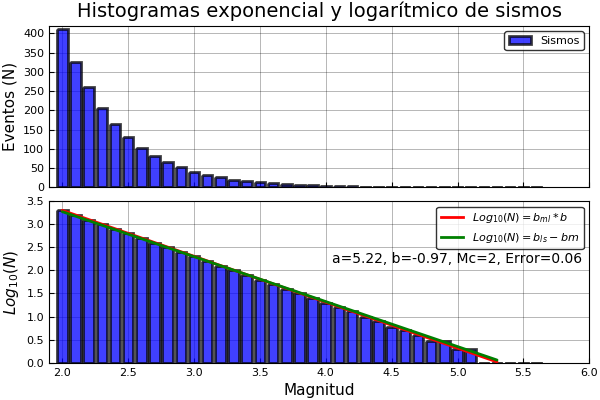

In [278]:

p1 = bar(bins,a.weights, ylabel="Eventos (N)",color="blue",grid=:true,alpha=0.75,xlims=(1.9,6),xticks=(2:0.5:6,[]), gridalpha=.4, grid=1.5, grid=:true, gridcolor="black", ylims=(0,420),yticks=(0:50:400), lab="Sismos", title="Histogramas exponencial y logarítmico de sismos")
p2 = bar(bins,loghn,xlabel="Magnitud", ylabel=L"$Log_{10} (N)$", color="blue", grid=:true, alpha=0.75, lab="", alpha=0.75, gridalpha=.4, grid=1.5, grid=:true, gridcolor="black", xlims=(1.9,6), xticks=(2:0.5:6), ylims=(0,3.5),yticks=(0:0.5:3.5), annotations=(5,2.25, text("a=5.22, b=-0.97, Mc=2, Error=0.06", 10),:left))
b2=bins[1:end-3]
p2=plot!(b2,[av + (-bva)*i for i in b2],linecolor="red", lab=L"$Log_{10} (N)=b_{ml}*b$") #bmáx
p2=plot!(b2,[A + bl*i for i in b2],linecolor="green",lab=L"$Log_{10} (N)=b_{ls}-bm$") #Ajuste lineal
plot(p1,p2,layout=(2,1),line=2, box=:true)
#gráfica exponencial de magnitudes,magnitudes acumuladas, ajuste lineal y bmáx.
#Valores de a=5.221657165786303, b=-0.9745693624060766, error cuadrático medio=0.058767155735964374

#  Referencias

-Vinuesa (2016). *Tema 9-Regresión lineal simple y polinomial: teoría y práctica*. Consultado en: http://www.ccg.unam.mx/~vinuesa/R4biosciences/docs/Tema9_regresion.html el 04/06/18.

-Barón F. (s.a). *15.Regresión lineal*. Consultado en: https://matap.dmae.upm.es/WebpersonalBartolo/Probabilidad/15_RegresionLineal.pdf el 09/06/18.

-Sin autor (s.a). *Análisis de regresión lineal*. Consultado en: http://www.geociencias.unam.mx/~ramon/EstInf/Clase17.pdf el 09/06/18.

-Mendoza A. (2012). *Estudio de la estabilidad del valor b para regiones sismotectónicas de México*. Tesis de maestría, UNAM, CGEO, Querétaro, México. 

-Sin autor (2018). *bmagnitude*. PDF
